In [1]:
%run -i main.py

100%|██████████| 26/26 [00:08<00:00,  2.91it/s]


100%|██████████| 26/26 [00:03<00:00,  6.80it/s]


100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


100%|██████████| 26/26 [00:08<00:00,  3.21it/s]


100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


100%|██████████| 26/26 [00:07<00:00,  3.37it/s]

In [2]:
import os 
import os.path as osp 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set_theme()

In [3]:
def read_csv(Path:str) -> pd.core.frame.DataFrame: 
    df = pd.read_csv(Path, index_col = 0 ) # (ref) https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
#    df = df.dropna(axis=0)  # drop rows(axis=0) including NaN

    return df

# Visualize Mean 

In [4]:
meanPath = osp.join('.', 'Means.csv')

mean_df = read_csv(meanPath)
mean_df

,category1,category2,category3,category4,category5,category6
0,0.019027,-0.484364,-0.117124,-0.108265,-0.108265,-0.044485
1,-0.256019,0.001423,-0.100993,-0.073433,-0.040775,-0.133038
2,0.041636,-0.005907,0.042968,0.132360,0.070003,-0.403189
3,-0.112817,0.000000,-0.031787,-0.013684,-0.013684,0.194391
4,-0.040606,NaN,-0.063240,0.969851,-0.161649,-0.161649
5,0.330878,NaN,-0.363588,0.248501,0.248501,0.056158
6,-0.048220,NaN,0.082911,-0.094496,-0.041214,-0.007207
7,-0.002893,NaN,0.176754,0.222746,-0.699042,0.007883
8,-0.034717,NaN,-0.035229,-0.237705,0.428247,0.016056
9,-0.052047,NaN,-0.187194,0.070003,-0.001683,0.030012


In [5]:
# (ref)https://datascienceparichay.com/article/get-column-names-as-list-in-pandas-dataframe/
col_list = mean_df.columns.values.tolist()  

case = [] 
for i in col_list:
    arr = mean_df[i].to_numpy().reshape(-1, 1) # vec to column array 
    case.append(arr)

heat = np.hstack(case)

Text(30.5, 0.5, 'Action')

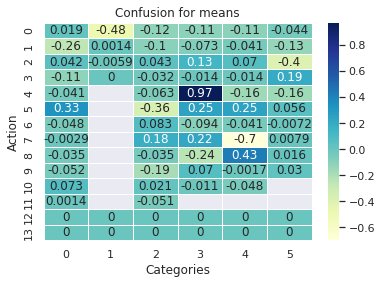

In [6]:
# (ref) https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(heat, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Confusion for means")
plt.xlabel('Categories')
plt.ylabel('Action')

# Visualize Nums

In [7]:
numPath = osp.join('.', 'Nums.csv')

num_df = read_csv(numPath)
num_df

,category1,category2,category3,category4,category5,category6
0,205.0,82.0,249.0,57.0,57.0,640.0
1,31.0,37.0,96.0,114.0,128.0,365.0
2,950.0,5164.0,962.0,23.0,21.0,38.0
3,5.0,0.0,16.0,161.0,161.0,42.0
4,685.0,NaN,736.0,1.0,139.0,139.0
5,21.0,NaN,21.0,30.0,30.0,46.0
6,734.0,NaN,20.0,26.0,3.0,450.0
7,1099.0,NaN,60.0,17.0,1.0,1690.0
8,1614.0,NaN,477.0,3.0,22.0,2080.0
9,435.0,NaN,32.0,21.0,4162.0,38.0


In [10]:
col_list = num_df.columns.values.tolist()  

case = [] 
for i in col_list:
    arr = num_df[i].to_numpy().reshape(-1, 1) # vec to column array 
    case.append(arr)

heat = np.hstack(case)

Text(30.5, 0.5, 'Action')

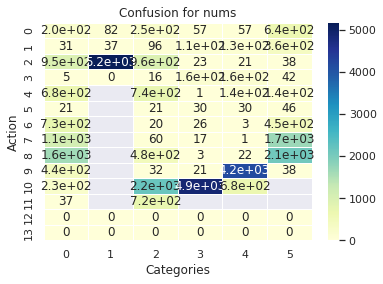

In [13]:
ax = sns.heatmap(heat, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Confusion for nums")
plt.xlabel('Categories')
plt.ylabel('Action')